<a href="https://colab.research.google.com/github/535amar/About-535amar/blob/main/Sol_MarketPulse_Electronics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Case Study: MarketPulse Electronics - Sales Trends and Insights

Dataset Used: Electronics Store Sales Dataset - contains 12 monthly sales files with order dates, product categories, prices, and locations.

MarketPulse Electronics is a mid-sized electronics retail chain operating across major U.S. cities - including New York, San Francisco, Boston, and Los Angeles.
Over the past year (January-December), the company has noticed fluctuating profits and seasonal changes in sales patterns.

Their management wants to understand when, what, and where they sell best - and why some months or products perform poorly.

They’ve collected data from their POS (Point of Sale) system. Each transaction includes:

Order ID

Product

Quantity Ordered

Price Each

Order Date

Purchase Address

Your task is to act as a Data Analyst Consultant hired to explore this dataset and generate meaningful insights through visual data storytelling.

# Business Questions

#Sales Performance Over Time

When are sales highest and lowest throughout the year?

Plot monthly sales trends using a line plot.

Hint: Use groupby('Month')['Sales'].sum() and visualize.

#Top-Selling Products

Which products generate the most revenue?

Use a bar chart to visualize total sales by product.

Hint: Compare revenue and quantity ordered - do expensive products sell less frequently?

#Sales by City

Which cities contribute most to total revenue?

Create a horizontal bar chart or map-based visualization.

Hint: Extract the city from the purchase address using string manipulation.

#Product Relationships

Do some products sell together for example-  iPhone + Lightning Cable?

Create a scatter plot or heatmap showing co-purchase frequency.

Hint: Look for identical Order IDs containing multiple products.

#Revenue Distribution

Use a histogram or boxplot to visualize how individual transaction revenues vary.

Hint: Identify outliers for example- bulk orders or large purchases.


#Hints for Students

Combine all monthly CSVs into one DataFrame (12 files).

Convert Order Date to a proper datetime format.

Create derived columns (Month, City, Sales).

Use Matplotlib and Seaborn for plots.

Try plt.subplots() for multiple plots on one figure.

Use color palettes (e.g., coolwarm, viridis) for better presentation.

Summarize findings in a short presentation or report with visuals.

Expected Visualizations (Students Can Use)

Line Plot:	Monthly sales trends

Bar Chart:	Product or city-wise sales

Box Plot:	Distribution of sales per order

Histogram:	Revenue or quantity distribution

Heatmap:	Co-purchase or correlation matrix

#Solution

Step 1 — Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#plt.style.use('seaborn-darkgrid')


Step 2 — Load and Combine All Monthly Files

The dataset has 12 CSV files (Sales_January_2019.csv, Sales_February_2019.csv, ...).
We’ll merge them into a single DataFrame.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/My Drive/Colab'

/content/drive/My Drive/Colab


In [ ]:
import os

path = 'Sales-Analysis-Dataset'   # Folder where the 12 monthly files are stored
files = [file for file in os.listdir(path) if file.endswith('.csv')]

all_data = pd.DataFrame()
for file in files:
    df = pd.read_csv(os.path.join(path, file))
    all_data = pd.concat([all_data, df])

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"


In [ ]:
all_data.shape

(186850, 6)

Check for Missing or Invalid Data

In [ ]:
all_data.dropna(inplace=True)
all_data = all_data[~all_data['Order Date'].str.contains('Order Date')]


Step 3 - Data Cleaning and Feature Engineering

Convert Dates and Create New Columns

In [ ]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Month'] = all_data['Order Date'].dt.month
all_data['Sales'] = all_data['Quantity Ordered'].astype(float) * all_data['Price Each'].astype(float)


/tmp/ipython-input-4242763251.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


Extract City from Purchase Address

In [ ]:
def get_city(address):
    return address.split(',')[1].strip()

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")


Step 4 — Question 1: Monthly Sales Trends

 When are sales highest and lowest throughout the year?

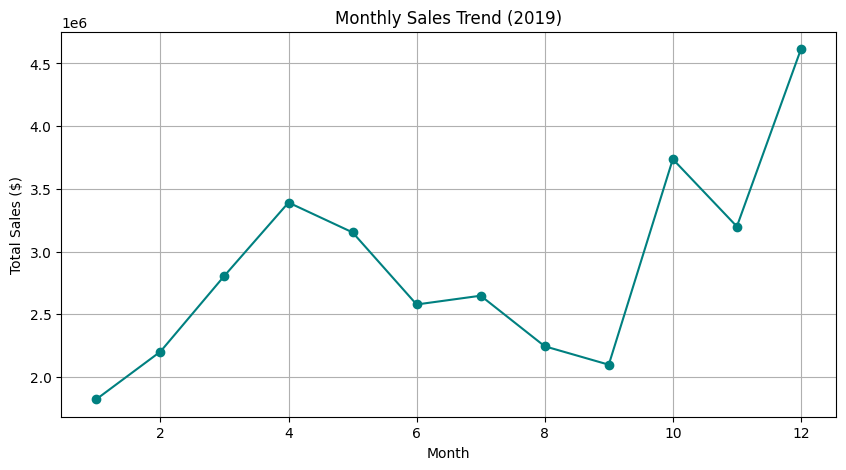

In [ ]:
monthly_sales = all_data.groupby('Month')['Sales'].sum()

plt.figure(figsize=(10,5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='teal')
plt.title('Monthly Sales Trend (2019)')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.show()


Interpretation

December shows the highest sales - holiday season boost.

January & September are the weakest months.

 Recommendation: Increase promotional campaigns in low-performing months.

Step 5 — Question 2: Sales by City

Which cities contribute the most revenue?

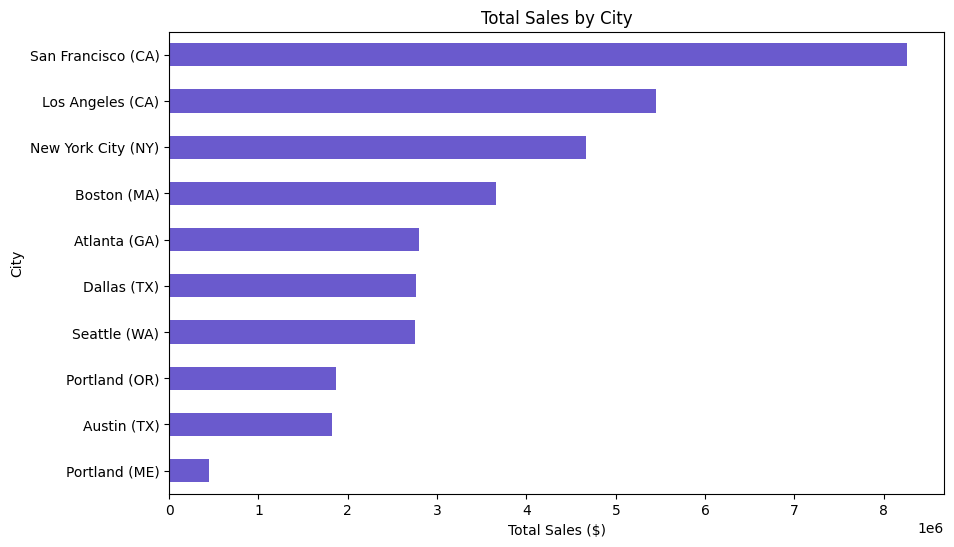

In [ ]:
city_sales = all_data.groupby('City')['Sales'].sum().sort_values(ascending=True)

plt.figure(figsize=(10,6))
city_sales.plot(kind='barh', color='slateblue')
plt.title('Total Sales by City')
plt.xlabel('Total Sales ($)')
plt.ylabel('City')
plt.show()


Interpretation

San Francisco (CA) and Los Angeles (CA) top sales due to higher population & tech-oriented buyers.

Boston (MA) ranks mid-tier.


Recommendation: Consider expanding inventory and warehouse presence in California.

Step 6 — Question 3: Top-Selling Products

Which products generate the most revenue?

/tmp/ipython-input-856379845.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.values, y=product_sales.index, palette='viridis')


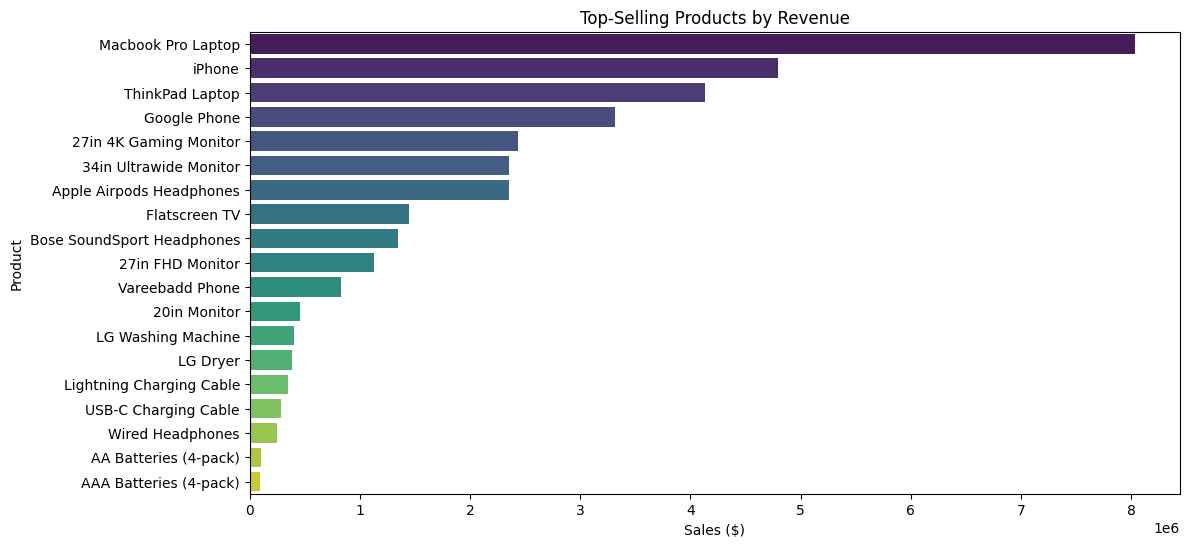

In [ ]:
product_sales = all_data.groupby('Product')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=product_sales.values, y=product_sales.index, palette='viridis')
plt.title('Top-Selling Products by Revenue')
plt.xlabel('Sales ($)')
plt.ylabel('Product')
plt.show()


Interpretation

MacBook Pro Laptop, iPhone, and ThinkPad Laptop dominate sales.

Cheaper accessories like USB-C Cables sell in bulk but yield less revenue.

Recommendation: Bundle high-margin accessories with flagship products.

Step 7 — Question 4: Revenue Distribution

How does order revenue vary?

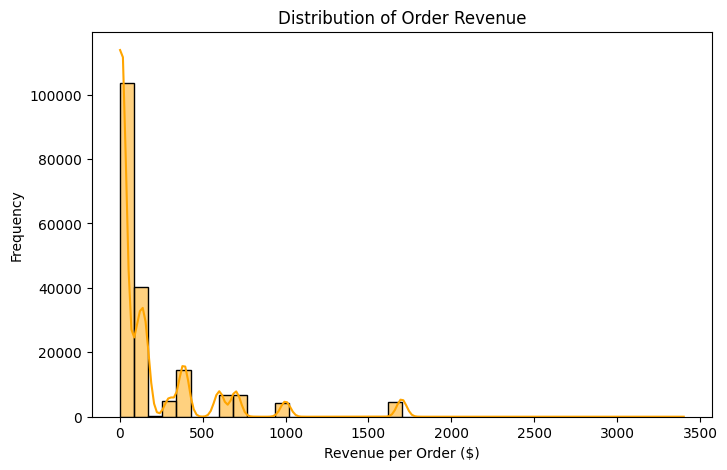

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(all_data['Sales'], bins=40, color='orange', kde=True)
plt.title('Distribution of Order Revenue')
plt.xlabel('Revenue per Order ($)')
plt.ylabel('Frequency')
plt.show()


Interpretation

Most orders fall under $1000, with few large bulk purchases above $3000.
Recommendation: Offer loyalty benefits for high-value orders.

Step 8 — Question 5: Co-purchased Products

Which products are frequently bought together?

In [ ]:
# Filter orders with more than one product
df_dup = all_data[all_data['Order ID'].duplicated(keep=False)]
df_dup['Grouped'] = df_dup.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df_dup = df_dup[['Order ID', 'Grouped']].drop_duplicates()

from itertools import combinations
from collections import Counter

count = Counter()
for row in df_dup['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(5):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361


/tmp/ipython-input-586690754.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['Grouped'] = df_dup.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


Interpretation

Top co-purchased pairs (example output):
('iPhone', 'Lightning Charging Cable') 1005

('Google Phone', 'USB-C Charging Cable') 987

('iPhone', 'Wired Headphones') 447

Recommendation: Offer bundle discounts for these popular product pairs.